## Trading Probability and Surplus

The point of this notebook is to compute the average number of trades and the expected surplus in the reverse directed search model 2 tier case.  The question is what happens when the difference in quality  between the 2 tiers increases.  This is part of a bigger question about what happens when the accuracy of the mapinator classification improves.  Does this create enough friction (competition for the top tier candates) to make things worse off.

In [1]:
using SymPy, Plots
x,z,y, v_1, v_2, n, m_1, m_2 = symbols("x,z,y, v_1, v_2, n, m_1, m_2")

(x, z, y, v_1, v_2, n, m_1, m_2)

There are two functions
$$
Q_1(x) = (1-\overline{\pi}\frac{(F(x^\ast)-F(x))}{m_1}-\frac{1-F(x^\ast)}{m_1})^{(n-1)}
$$
when $x<x^\ast$ and
$$
Q_1(x) = (1-(\frac{1-F(x)}{m_1}))^{n-1}
$$
otherwise.

In [2]:
# find the cutoff
rhs = v_1*((1-(1-y)/(m_1))^(n-1))
z=solve(v_2-rhs,y)[1]

         1           
       ─────         
       n - 1         
   ⎛v₂⎞              
m₁⋅⎜──⎟      - m₁ + 1
   ⎝v₁⎠              

In [3]:

pi =(v_2/v_1)^(1/(n-1))*m_1/m_2/(1+(v_2/v_1)^(1/(n-1))*m_1/m_2)

              1      
            ─────    
            n - 1    
        ⎛v₂⎞         
     m₁⋅⎜──⎟         
        ⎝v₁⎠         
─────────────────────
   ⎛         1      ⎞
   ⎜       ─────    ⎟
   ⎜       n - 1    ⎟
   ⎜   ⎛v₂⎞         ⎟
   ⎜m₁⋅⎜──⎟         ⎟
   ⎜   ⎝v₁⎠         ⎟
m₂⋅⎜──────────── + 1⎟
   ⎝     m₂         ⎠

In [4]:
Q_1 = (1-(max(z-x,0)*pi)/m_1 - ((1-max(z,x))/m_1))^(n-1)

                                                                              
⎛          1                                                                  
⎜        ─────                                                                
⎜        n - 1                                                                
⎜    ⎛v₂⎞                                                                     
⎜    ⎜──⎟     ⋅Max(0, m_1*(v_2/v_1)**(1/(n - 1)) - m_1 - x + 1)               
⎜    ⎝v₁⎠                                                         1 - Max(x, m
⎜1 - ────────────────────────────────────────────────────────── - ────────────
⎜                         ⎛         1      ⎞                                  
⎜                         ⎜       ─────    ⎟                                  
⎜                         ⎜       n - 1    ⎟                                  
⎜                         ⎜   ⎛v₂⎞         ⎟                                  
⎜                         ⎜m₁⋅⎜──⎟         ⎟        

In [5]:
pbar = sympy.Piecewise((pi, Le(x,z)), (1, Gt(x,z)))

⎧              1                                     
⎪            ─────                                   
⎪            n - 1                       1           
⎪        ⎛v₂⎞                          ─────         
⎪     m₁⋅⎜──⎟                          n - 1         
⎪        ⎝v₁⎠                      ⎛v₂⎞              
⎪─────────────────────  for x ≤ m₁⋅⎜──⎟      - m₁ + 1
⎪   ⎛         1      ⎞             ⎝v₁⎠              
⎨   ⎜       ─────    ⎟                               
⎪   ⎜       n - 1    ⎟                               
⎪   ⎜   ⎛v₂⎞         ⎟                               
⎪   ⎜m₁⋅⎜──⎟         ⎟                               
⎪   ⎜   ⎝v₁⎠         ⎟                               
⎪m₂⋅⎜──────────── + 1⎟                               
⎪   ⎝     m₂         ⎠                               
⎪                                                    
⎩          1                      otherwise          

In [6]:
Q_2 = (1-max(z-x,0)*(1-pi)/m_2)^(n-1)

                                                                              
⎛    ⎛                1          ⎞                                            
⎜    ⎜              ─────        ⎟                                            
⎜    ⎜              n - 1        ⎟                                            
⎜    ⎜          ⎛v₂⎞             ⎟                                            
⎜    ⎜       m₁⋅⎜──⎟             ⎟                                            
⎜    ⎜          ⎝v₁⎠             ⎟                                            
⎜    ⎜- ───────────────────── + 1⎟⋅Max(0, m_1*(v_2/v_1)**(1/(n - 1)) - m_1 - x
⎜    ⎜     ⎛         1      ⎞    ⎟                                            
⎜    ⎜     ⎜       ─────    ⎟    ⎟                                            
⎜    ⎜     ⎜       n - 1    ⎟    ⎟                                            
⎜    ⎜     ⎜   ⎛v₂⎞         ⎟    ⎟                                            
⎜    ⎜     ⎜m₁⋅⎜──⎟         ⎟    ⎟                  

In [7]:
Prob1 = pbar*Q_1
Prob2 = (1-pbar)*Q_2

                                                                              
⎛    ⎛                1          ⎞                                            
⎜    ⎜              ─────        ⎟                                            
⎜    ⎜              n - 1        ⎟                                            
⎜    ⎜          ⎛v₂⎞             ⎟                                            
⎜    ⎜       m₁⋅⎜──⎟             ⎟                                            
⎜    ⎜          ⎝v₁⎠             ⎟                                            
⎜    ⎜- ───────────────────── + 1⎟⋅Max(0, m_1*(v_2/v_1)**(1/(n - 1)) - m_1 - x
⎜    ⎜     ⎛         1      ⎞    ⎟                                            
⎜    ⎜     ⎜       ─────    ⎟    ⎟                                            
⎜    ⎜     ⎜       n - 1    ⎟    ⎟                                            
⎜    ⎜     ⎜   ⎛v₂⎞         ⎟    ⎟                                            
⎜    ⎜     ⎜m₁⋅⎜──⎟         ⎟    ⎟                  

In [8]:
Prob=pbar*Q_1+(1-pbar)*Q_2
surplus=pbar*v_1*Q_1+(1-pbar)*v_2*Q_2

                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
   ⎛          1                                                               
   ⎜        ─────                                                             
   ⎜        n - 1                                   

In [9]:
# calculate the weighted average of values of the two tiers
function surplus_test(a)
    vbar = a[3]*(a[1]/(a[1]+a[2]))+a[4]*(a[2]/(a[1]+a[2]))
    return vbar
end
## calculate trading probabilities Q_1 and Q_2 with no ai then ai
function p_lot(x,b)
    vbar = surplus_test(b)
    #use average quality for all grads, then break the tiers down using
    plot(Prob1(m_1 => b[1],m_2=>b[2],v_1=>vbar,v_2=>vbar,n=>a[5]),0,1)
    plot!(Prob1(m_1 => b[1],m_2=>b[2],v_1=>b[3],v_2=>b[4],n=>b[5]),0,1)
    plot!(Prob2(m_1 => b[1],m_2=>b[2],v_1=>vbar,v_2=> vbar,n =>b[5]),0,1)
    plot!(Prob2(m_1 => b[1],m_2=>b[2],v_1=>b[3],v_2=>b[4],n=>b[5]),0,1)
end
function p_e(x,a)
    # for testing
    plot(Prob1(m_1 => a[1],m_2=>a[2],v_1=>a[3],v_2=>a[4],n=>a[5]),.9,1)
end
# calculate Q_1 with different parameters for comparison
function Q_lot(x,a,b)
    plot(Q_1(m_1 => a[1],m_2=>a[2],v_1=>a[3],v_2=>a[4],n=>a[5]),0,1)
    plot!(Q_1(m_1 => b[1],m_2=>b[2],v_1=>b[3],v_2=>b[4],n=>b[5]),0,1)
end
# calculate overall trading probability first without then with ai
# values in b are averaged to get the without part
function q_lot(x,b)
    vbar = surplus_test(b)
    plot(Prob(m_1 => b[1],m_2=>b[2],v_1=>vbar,v_2=>vbar,n=>b[5]),0,1)
    plot!(Prob(m_1 => b[1],m_2=>b[2],v_1=>b[3],v_2=>b[4],n=>b[5]),0,1)
end
# calculate overall surplus with parameters
function s_lot(x,b)
    vbar = surplus_test(b)
    plot(surplus(m_1=>b[1],m_2=>b[2],v_1=>vbar,v_2=>vbar,n=>b[5]),0,1)
    plot!(surplus(m_1 => b[1],m_2=>b[2],v_1=>b[3],v_2=>b[4],n=>b[5]),0,1)
end
function i_surplus_with(x,a)
    return surplus(m_1 => a[1],m_2=>a[2],v_1=>a[3],v_2=>a[4],n=>a[5])
end
function i_surplus_without(x,a)
    vbar = surplus_test(a)
    return surplus(m_1 => a[1],m_2=>a[2],v_1=>vbar,v_2=>vbar,n=>a[5])
end
function i_Prob_with(x,a)
    return Prob(m_1 => a[1],m_2=>a[2],v_1=>a[3],v_2=>a[4],n=>a[5])
end
function i_Prob_without(x,a)
    vbar = surplus_test(a)
    return Prob(m_1 => a[1],m_2=>a[2],v_1=>vbar,v_2=>vbar,n=>a[5])
end


i_Prob_without (generic function with 1 method)

In [10]:
#m_1 => 7,m_2=>7,v_1=>.65,v_2=>.65,n=>14
a = [3,8,.6,.5,14];
b = [5,14,.8,.5,20];
surplus_test(b)

0.5789473684210527

In [11]:
# probability Q_1 first a has a low v_1 b has high v_1 
#Q_lot(x,a,b)

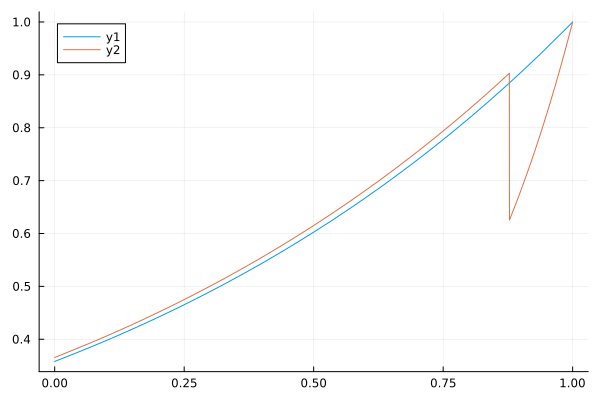

In [12]:
## overall trading probabilities without ai first then with ai
# in a every grad has expected quality in b tiers are distinguished
q_lot(x,b)

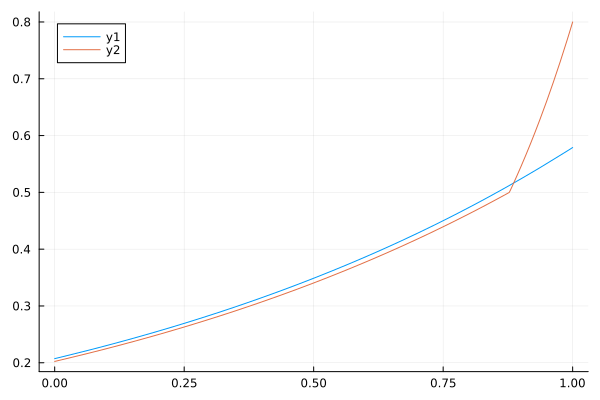

In [13]:
# expected surplus without then with
s_lot(x,b)

In [14]:
(integrate(i_surplus_without(x,b),0,1)-integrate(i_surplus_with(x,b),0,1))/integrate(i_surplus_with(x,b),0,1)

-0.0120434430524721

In [15]:
integrate(i_Prob_without(x,b),0,1)-integrate(i_Prob_with(x,b),0,1)

0.00672050879678132